In [31]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
np.random.seed(0)

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([ 6.95385695,  7.53440676,  8.11495658,  8.6955064 ,  9.27605621,
         9.85660603, 10.43715585, 11.01770566, 11.59825548, 12.1788053 ,
        12.75935511]),
 <BarContainer object of 10 artists>)

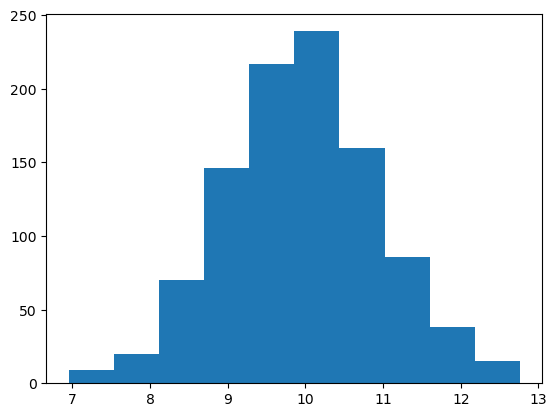

In [3]:
# Check that your notebook and matplotlib are working.
x = np.random.normal(10, size=1000)
plt.hist(x)

In [101]:
# Synthetic data
np.random.seed(0)

cluster_size = np.array([30, 20])
num_point = cluster_size.sum()
means = np.array([[5, 0], [0, 5]])
sds = [1, 1]
num_clust, num_dim = means.shape

clust_assignment = np.concatenate([[i] * s for i, s in enumerate(cluster_size)])
x = np.ones((num_point, num_dim)) * np.nan
for i in range(num_clust):
    mean_i = means[i]
    sd_i = sds[i]
    x_maybe = sp.stats.multivariate_normal(mean=mean_i, cov=np.eye(num_dim) * sd_i).rvs(size=num_point)
    x[clust_assignment == i] = x_maybe[clust_assignment == i]

x = pd.DataFrame(x, columns=[f'x{i}' for i in range(num_dim)])

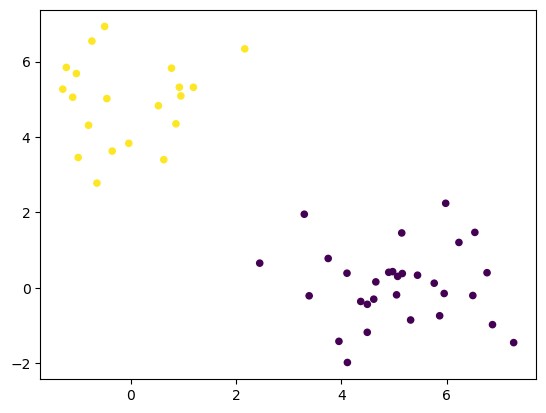

In [102]:
fig, ax = plt.subplots()
artist = ax.scatter('x0', 'x1', c=clust_assignment, data=x, s=20)

In [4]:
# Synthetic data
np.random.seed(0)

num_clust = 3
num_dim = 2
num_point = 100
concentration = 2

expect_clust_frac = sp.stats.dirichlet(np.ones(num_clust) * concentration).rvs().squeeze()
clust_assignment = sp.stats.multinomial(1, p=expect_clust_frac).rvs(size=num_point).squeeze().argmax(1)

means = sp.stats.norm(loc=0, scale=10).rvs(size=(num_clust, num_dim))
sds = sp.stats.lognorm(loc=0, s=1).rvs(size=num_clust)
x = np.ones((num_point, num_dim)) * np.nan
for i in range(num_clust):
    mean_i = means[i]
    sd_i = sds[i]
    x_maybe = sp.stats.multivariate_normal(mean=mean_i, cov=np.eye(num_dim) * sd_i).rvs(size=num_point)
    x[clust_assignment == i] = x_maybe[clust_assignment == i]

x = pd.DataFrame(x, columns=[f'x{i}' for i in range(num_dim)])

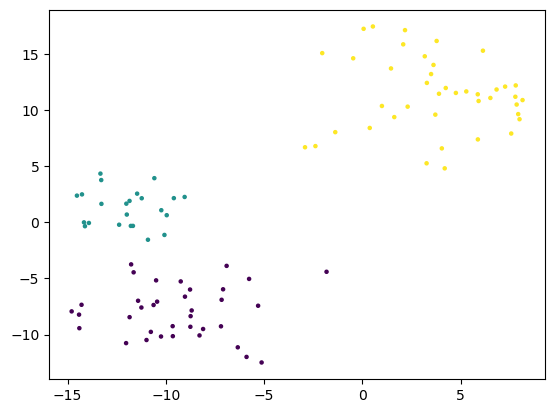

In [5]:
fig, ax = plt.subplots()
artist = ax.scatter('x0', 'x1', c=clust_assignment, data=x, s=5)

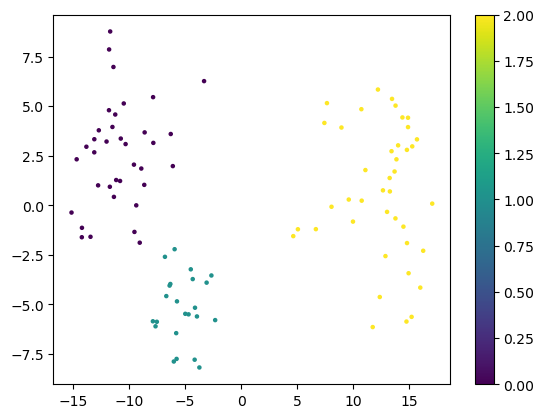

In [6]:
from sklearn.decomposition import PCA

pca_coords = pd.DataFrame(PCA().fit_transform(x)).rename(columns=lambda i: f'pc{i}')

fig, ax = plt.subplots()
artist = ax.scatter('pc0', 'pc1', c=clust_assignment, data=pca_coords, s=5)
fig.colorbar(artist)

In [7]:
cdmat = sp.spatial.distance.pdist(x, metric='euclidean')

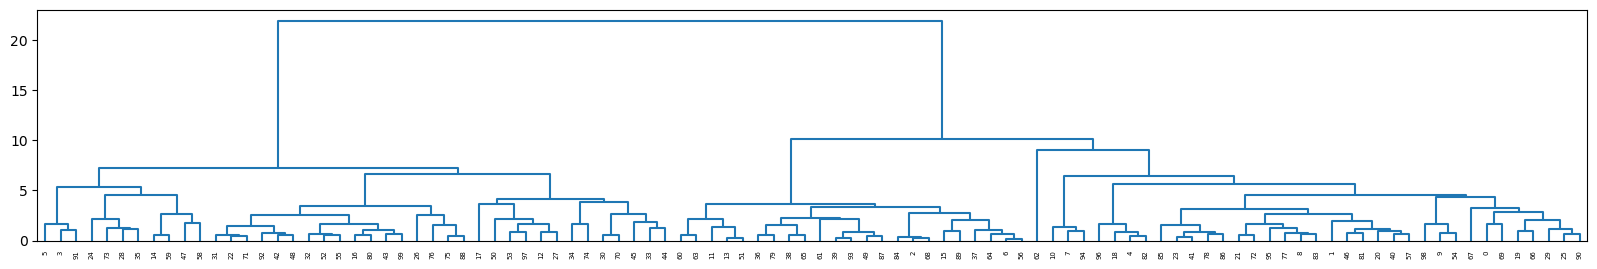

In [8]:
linkage = sp.cluster.hierarchy.linkage(cdmat, method='average')

fig, ax = plt.subplots(figsize=(20, 3))
sp.cluster.hierarchy.dendrogram(linkage, ax=ax, labels=None, color_threshold=0)
None

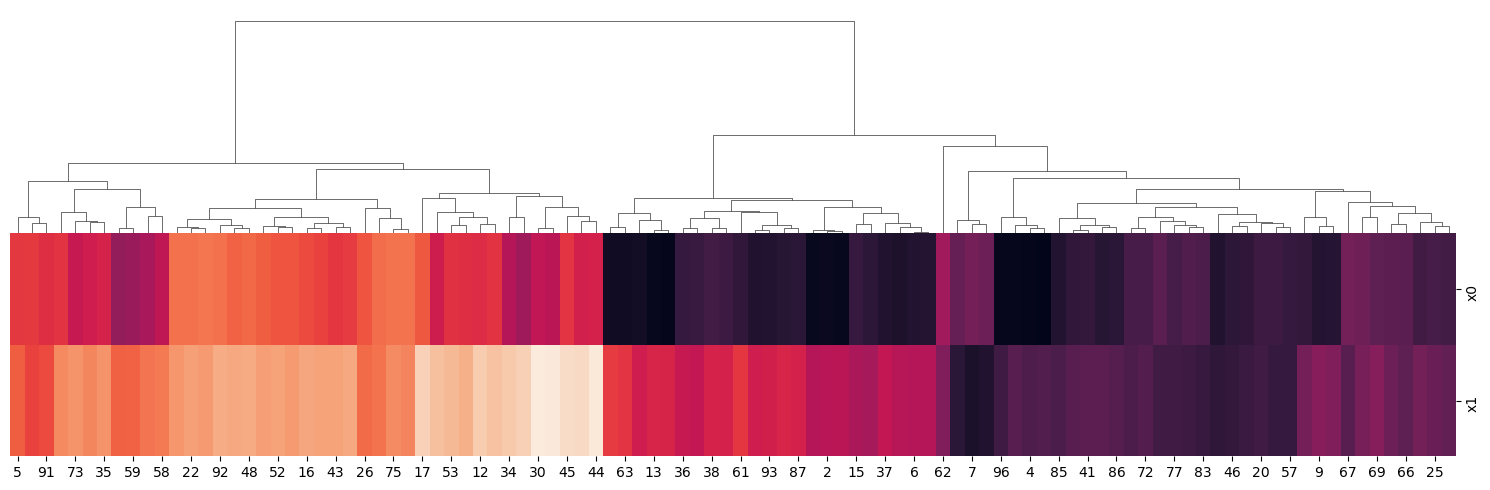

In [9]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5)
)

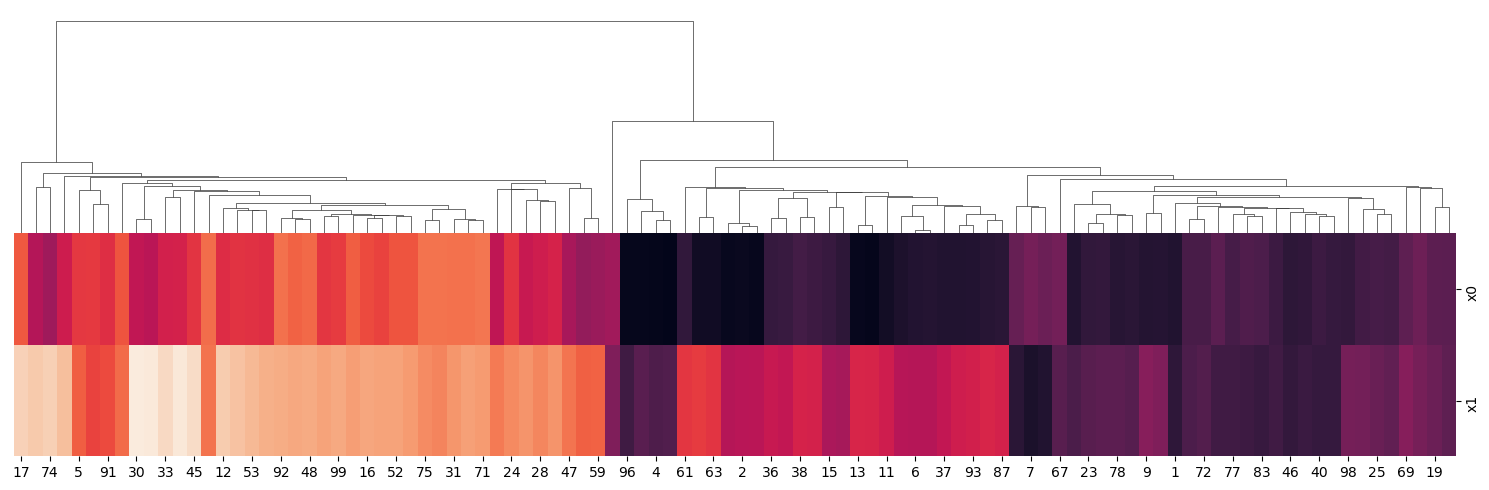

In [10]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='single')
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5)
)

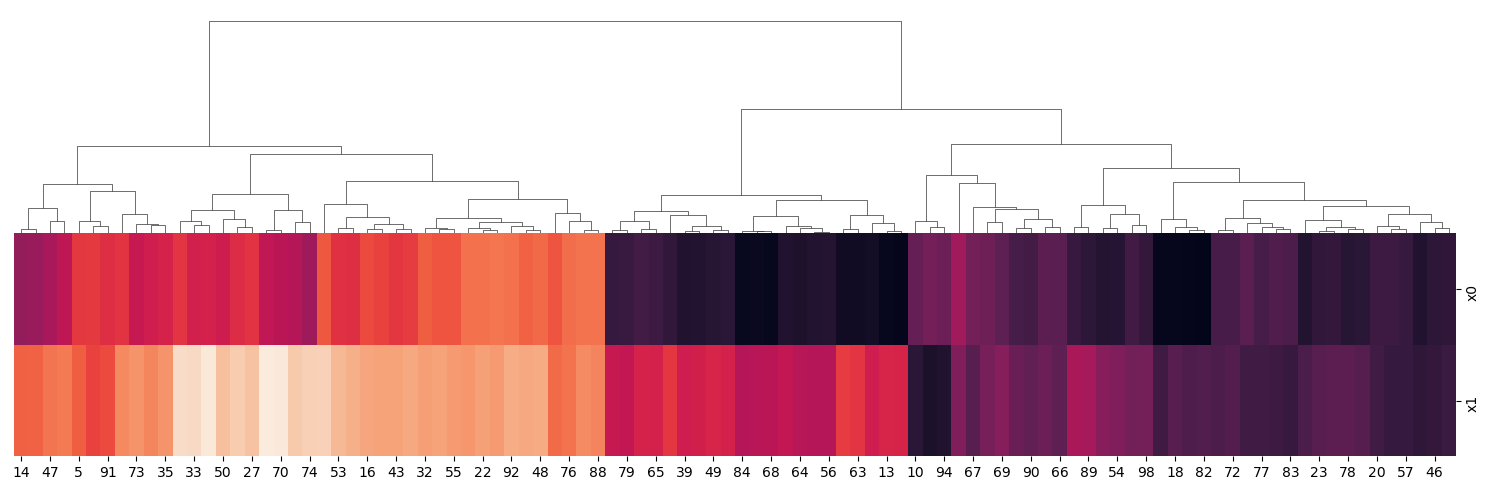

In [11]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='complete')
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5)
)

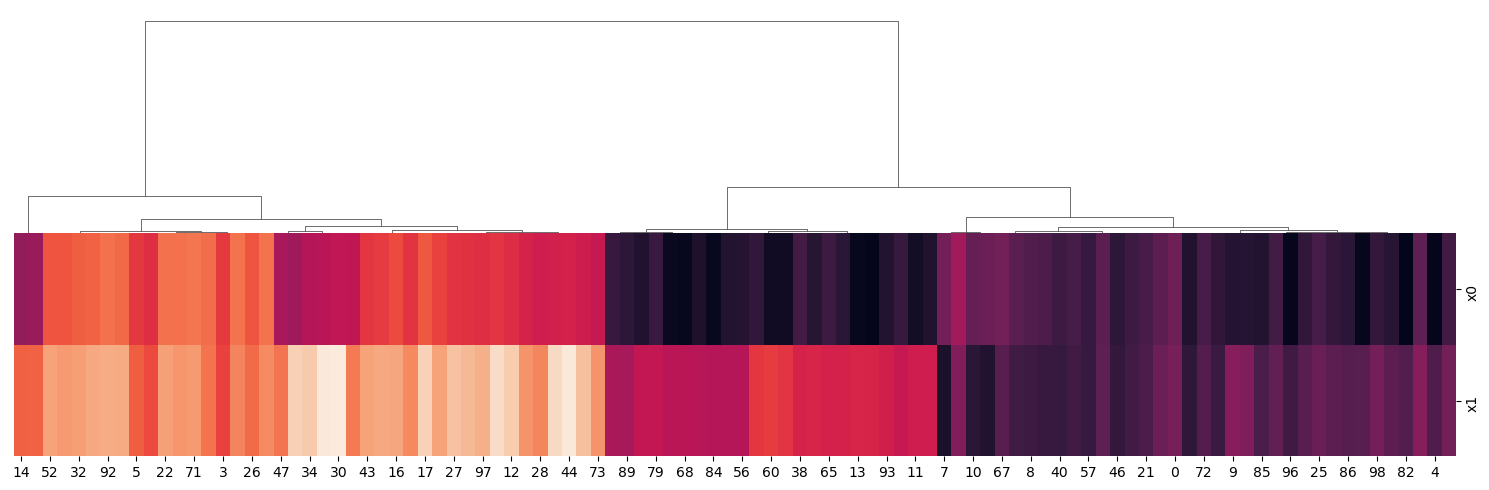

In [12]:
_cdmat = sp.spatial.distance.pdist(x, metric='cosine')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5)
)

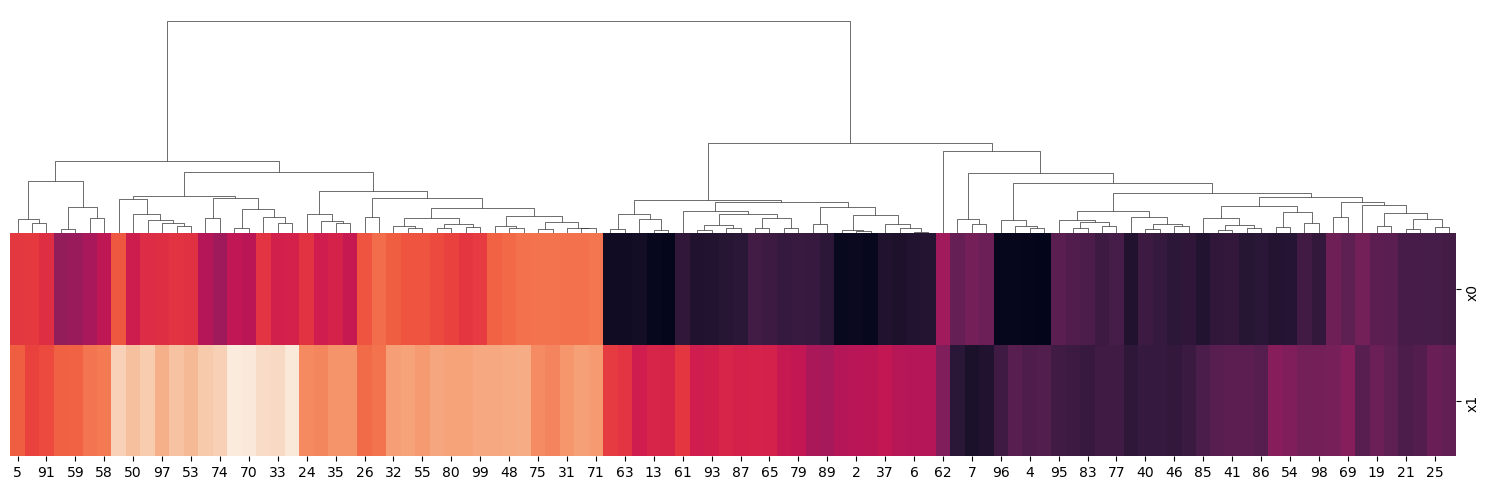

In [13]:
_cdmat = sp.spatial.distance.pdist(x, metric='cityblock')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5)
)

In [14]:
clust_label = sp.cluster.hierarchy.fcluster(linkage, t=10, criterion='distance') - 1
clust_label

array([2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0], dtype=int32)

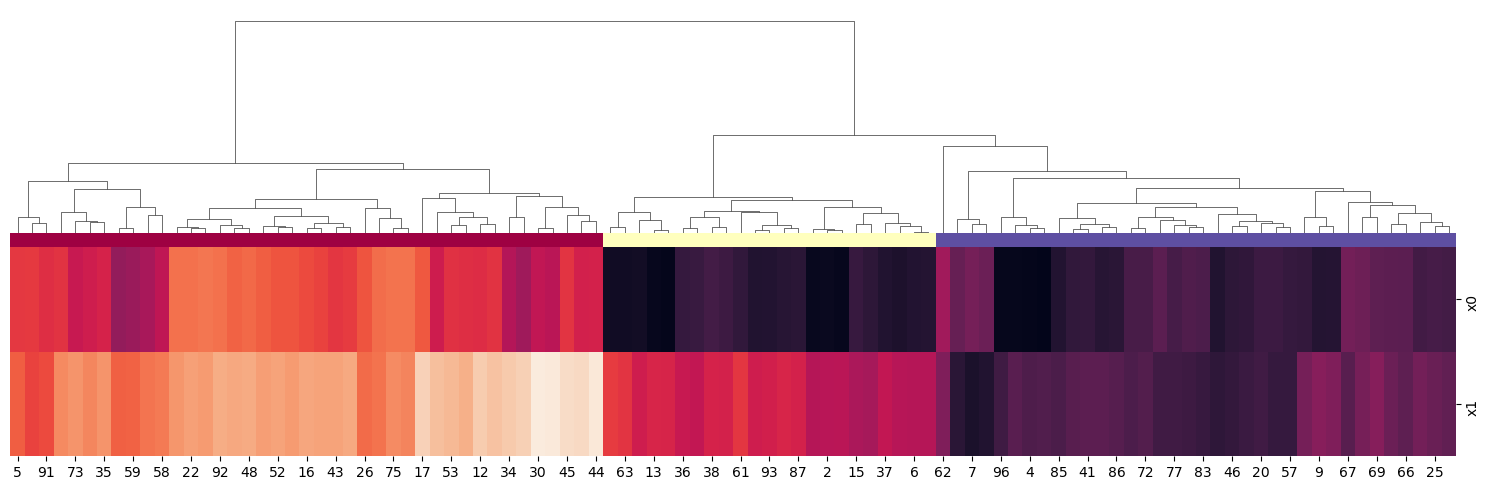

In [15]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
_clust_label = sp.cluster.hierarchy.fcluster(_linkage, t=10, criterion='distance') - 1
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5),
    col_colors=mpl.cm.Spectral(_clust_label / _clust_label.max()),
)

In [16]:
pdmat = pd.DataFrame(squareform(cdmat))

wss = []
for i in range(clust_label.max() + 1):
    wss.extend(squareform(pdmat.loc[clust_label==i, clust_label==i]))
    
wss = sum(wss)

In [17]:
def wss(pdmat, clust):
    wss = []
    for i in np.unique(clust):
        wss.extend(squareform(pdmat.loc[clust==i, clust==i]))
    return sum(wss)

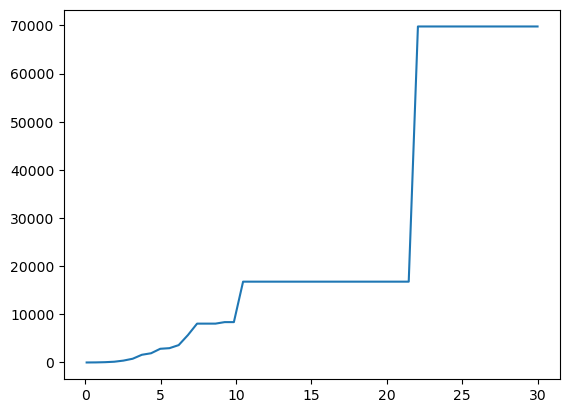

In [18]:
wss_t = {}
for thresh in np.linspace(0.1, 30, num=50):
    _clust_label = sp.cluster.hierarchy.fcluster(linkage, t=thresh, criterion='distance') - 1
    wss_t[thresh] = wss(pdmat, _clust_label)

wss_t = pd.Series(wss_t)

plt.plot(wss_t)

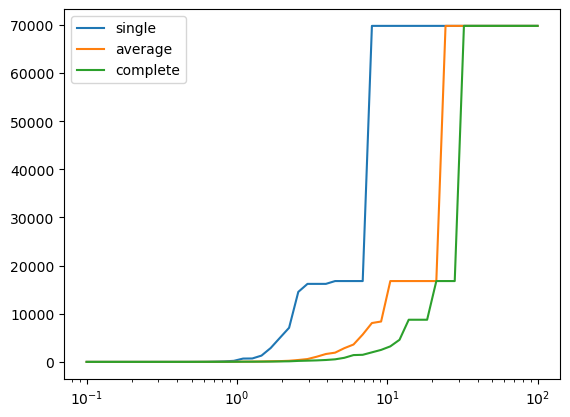

In [19]:
for method in ['single', 'average', 'complete']:
    _cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
    _linkage = sp.cluster.hierarchy.linkage(_cdmat, method=method)
    wss_t = {}
    for thresh in np.logspace(-1, 2, num=50):
        _clust_label = sp.cluster.hierarchy.fcluster(
            _linkage,
            t=thresh,
            criterion='distance'
        ) - 1
        wss_t[thresh] = wss(pdmat, _clust_label)
    wss_t = pd.Series(wss_t)
    plt.plot(wss_t, label=method)
    
plt.legend()
plt.xscale('log')

In [20]:
_clust_label_bs = []

for i in range(10):
    _x_bs = x.sample(frac=0.67, replace=False)
    _pdmat = pdmat.loc[_x_bs.index, _x_bs.index]
    _cdmat = squareform(_pdmat)
    _linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
    _clust_label = sp.cluster.hierarchy.fcluster(_linkage, t=10, criterion='distance') - 1

    _clust_label_bs.append(pd.Series(_clust_label, index=_x_bs.index))
_clust_label_bs = pd.DataFrame(_clust_label_bs).T

In [32]:
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(1, 10):
    agg = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average').fit(_pdmat)

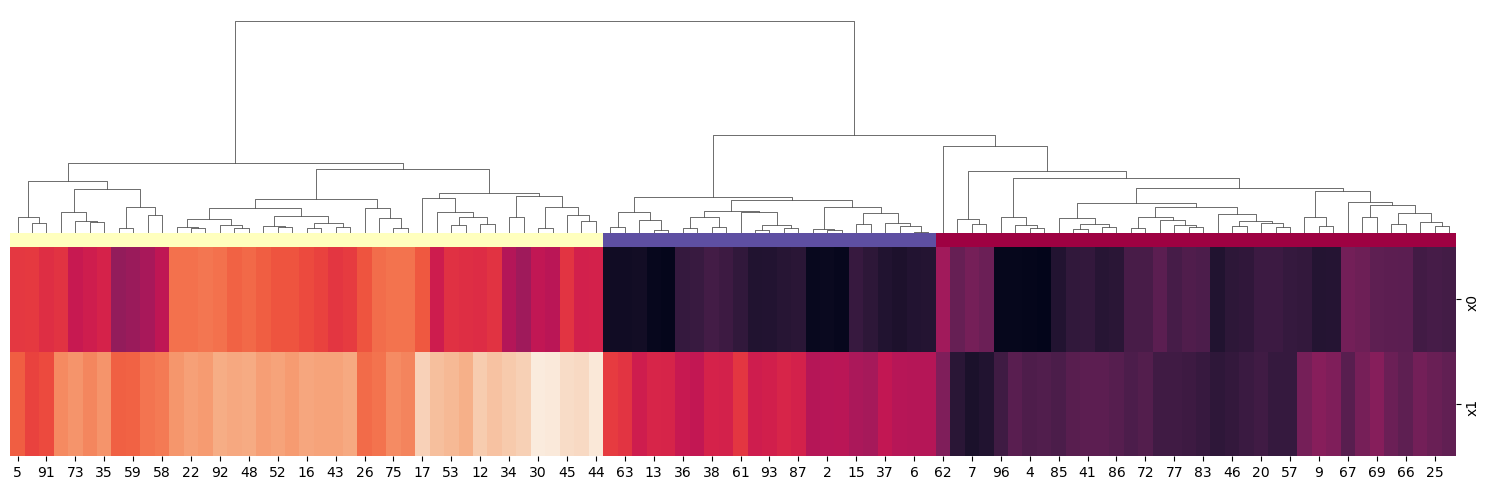

In [48]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
_agg = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average').fit(squareform(_cdmat))
_clust_label = _agg.labels_
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5),
    col_colors=mpl.cm.Spectral(_clust_label / _clust_label.max()),
)

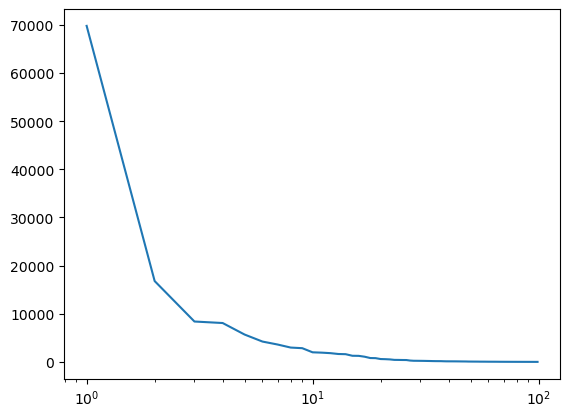

In [46]:
wss_t = {}
for n_clusters in np.arange(1, 100):
    _cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
    _pdmat = pd.DataFrame(squareform(_cdmat))
    _agg = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average').fit(_pdmat)
    _clust_label = _agg.labels_
    wss_t[n_clusters] = wss(_pdmat, _clust_label)

wss_t = pd.Series(wss_t)

plt.plot(wss_t)
plt.xscale('log')

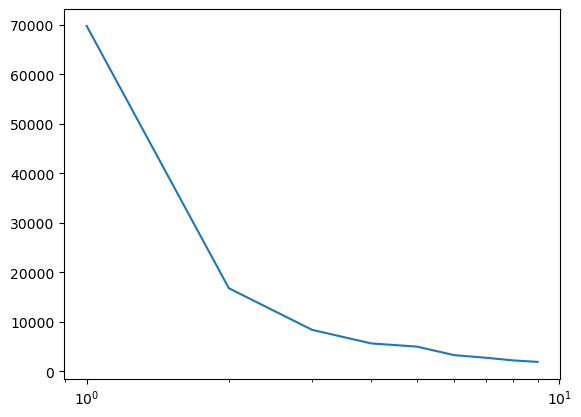

In [50]:
wss_t = {}
for n_clusters in np.arange(1, 10):
    _cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
    _pdmat = pd.DataFrame(squareform(_cdmat))
    _agg = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward').fit(x)
    _clust_label = _agg.labels_
    wss_t[n_clusters] = wss(_pdmat, _clust_label)

wss_t = pd.Series(wss_t)

plt.plot(wss_t)
plt.xscale('log')

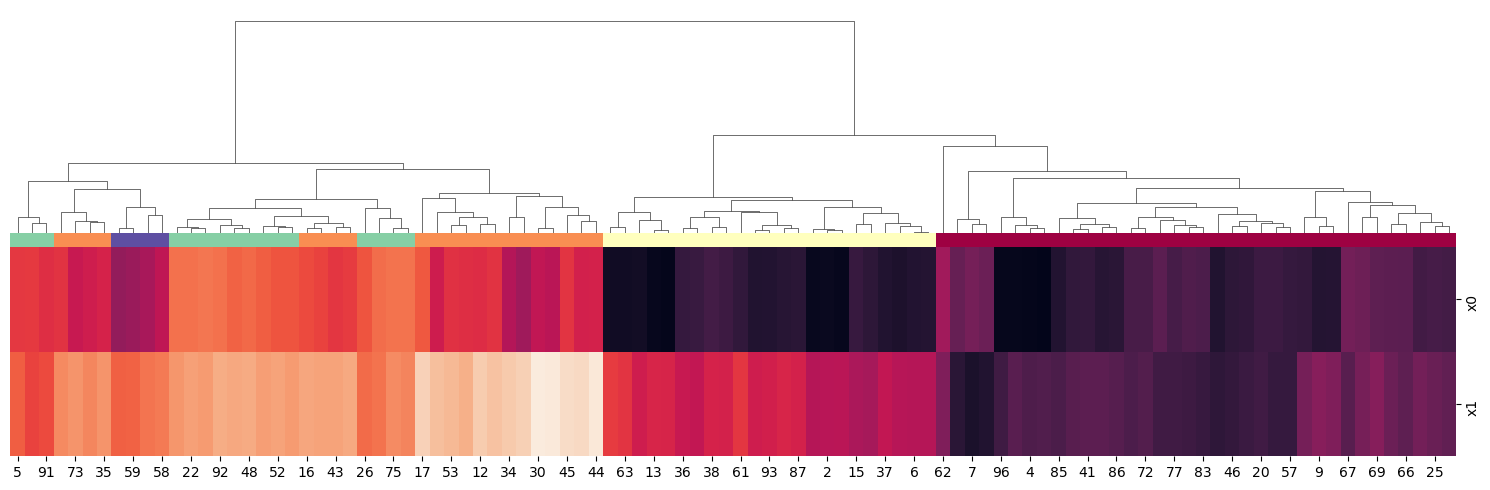

In [53]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
_agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward').fit(x)
_clust_label = _agg.labels_
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5),
    col_colors=mpl.cm.Spectral(_clust_label / _clust_label.max()),
)

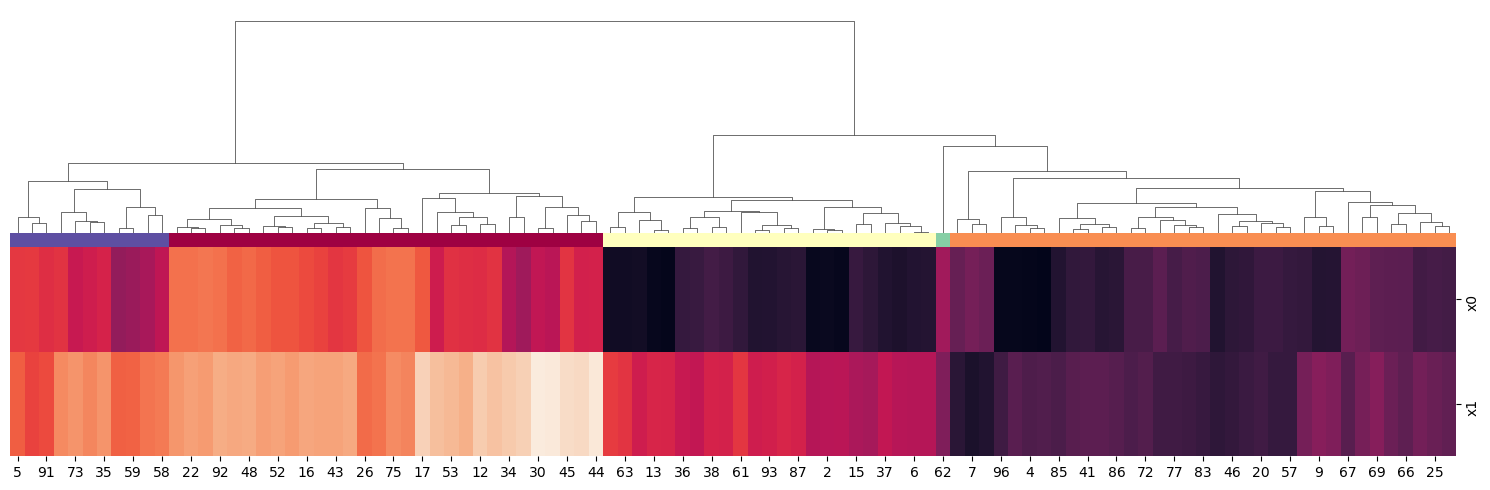

In [54]:
_cdmat = sp.spatial.distance.pdist(x, metric='euclidean')
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method='average')
_agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average').fit(x)
_clust_label = _agg.labels_
sns.clustermap(
    x.T,
    col_linkage=_linkage,
    row_cluster=False,
    figsize=(15, 5),
    cbar_pos=None,
    dendrogram_ratio=(0.0, 0.5),
    col_colors=mpl.cm.Spectral(_clust_label / _clust_label.max()),
)

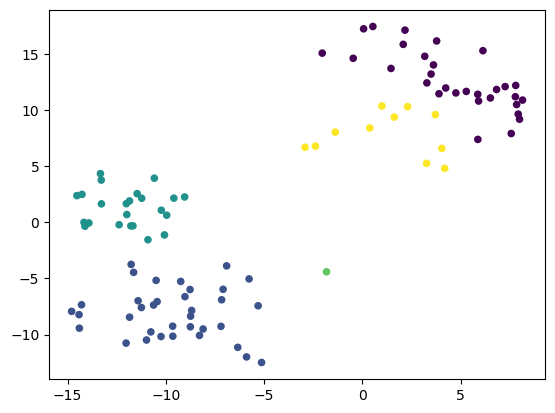

In [58]:
plt.scatter('x0', 'x1', c=_clust_label, data=x, s=20)

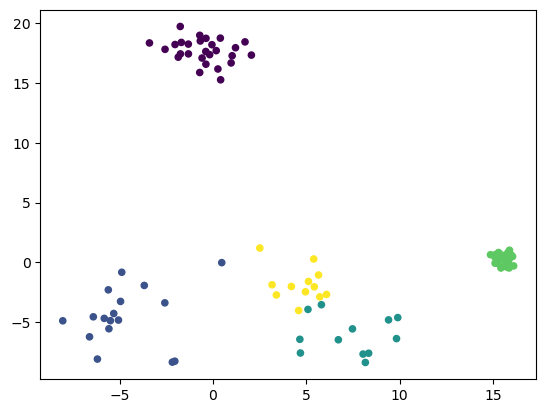

In [84]:
def simulate_clusters(
    num_clust=3,
    num_dim=2,
    num_point=100,
    concentration=2,
    seed=None
):
    np.random.seed(seed)
    expect_clust_frac = sp.stats.dirichlet(np.ones(num_clust) * concentration).rvs().squeeze()
    clust_assignment = sp.stats.multinomial(1, p=expect_clust_frac).rvs(size=num_point).squeeze().argmax(1)

    means = sp.stats.norm(loc=0, scale=10).rvs(size=(num_clust, num_dim))
    sds = sp.stats.lognorm(loc=0, s=1).rvs(size=num_clust)
    x = np.ones((num_point, num_dim)) * np.nan
    for i in range(num_clust):
        mean_i = means[i]
        sd_i = sds[i]
        x_maybe = sp.stats.multivariate_normal(mean=mean_i, cov=np.eye(num_dim) * sd_i).rvs(size=num_point)
        x[clust_assignment == i] = x_maybe[clust_assignment == i]
    x = pd.DataFrame(x, columns=[f'x{i}' for i in range(num_dim)])
    return x, clust_assignment

_x, _clust = simulate_clusters(num_clust=5, num_dim=10)

plt.scatter('x0', 'x1', c=_clust, data=_x, s=20)